In [30]:
from torchvision.io import read_image
from torchvision.transforms.functional import crop
from torchvision.transforms.functional import invert
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import torch
from PIL import Image
import os
import albumentations as A
from albumentations.pytorch import ToTensorV2
import pydicom
from pydicom.data import get_testdata_file
pydicom.config.convert_wrong_length_to_UN = True
from skimage import exposure
from scipy import stats
from IPython.display import clear_output

In [31]:

image_information = pd.DataFrame()
img_dir = r'/home/alex/Documents/new try/Data/losw-dose-simulation/Phantom'
files = os.listdir(img_dir)
for idx in range(len(files)):
    file_path = os.path.join(img_dir, files[idx])
    ds = pydicom.dcmread(file_path, force = True)
    try:
        muAs = ds.ExposureInuAs
        filter_type = ds.FilterType
        addition = pd.DataFrame.from_dict({
            "file_path" : files[idx],
            "muAs" : [muAs],
            "filter_type" : filter_type
        })
        image_information = pd.concat([image_information, addition], ignore_index= True, axis= 0)
    except:
        pass

In [32]:
image_information = image_information.sort_values(by = 'muAs').reset_index(drop=True)
image_information

,file_path,muAs,filter_type
0,650.dcm,650,CU_0.3_MM
1,710.dcm,710,CU_0.3_MM
2,760.dcm,760,CU_0.3_MM
3,840.dcm,840,CU_0.3_MM
4,950.dcm,950,CU_0.3_MM
5,1050.dcm,1050,CU_0.3_MM
6,1150.dcm,1150,CU_0.3_MM
7,1250.dcm,1250,CU_0.3_MM
8,1390.dcm,1390,CU_0.3_MM
9,1550.dcm,1550,CU_0.3_MM


In [33]:
def get_image(idx):
    file_name = image_information['file_path'][idx]
    file_path = f'/home/alex/Documents/new try/Data/losw-dose-simulation/Phantom/{file_name}'
    ds = pydicom.dcmread(file_path, force = True)
    ds_center = ds.WindowCenter
    ds_width = ds.WindowWidth
    dcm_img = ds.pixel_array
    image = (dcm_img - (ds_center - ds_width/2)) / ds_width
    image = np.clip(image, a_min=0, a_max=1)
    return np.uint8(255*image)

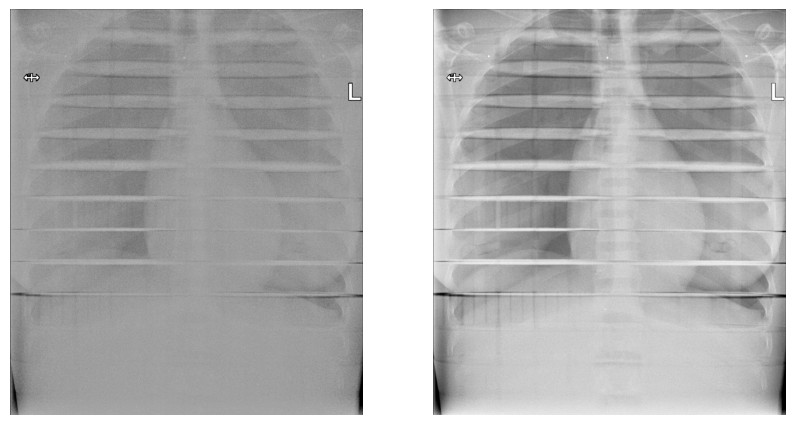

In [34]:
image_1 = get_image(2)
image_2 = get_image(14)

fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].imshow(image_1, cmap='gray', vmin = 0, vmax = 255)
axs[0].axis('off')
axs[1].imshow(image_2, cmap='gray', vmin = 0, vmax = 255)
axs[1].axis('off')
plt.savefig(r'/home/alex/Documents/Images_thesis/phantom_example.png', bbox_inches="tight")
plt.show()

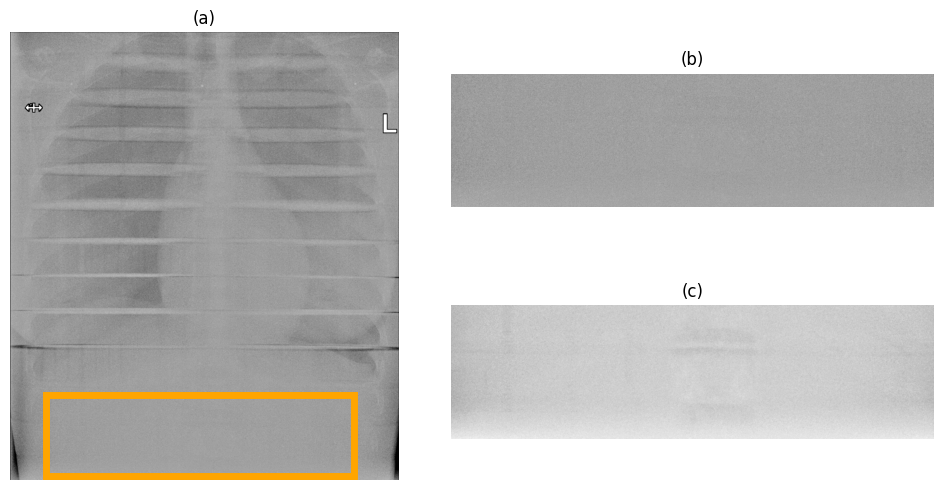

In [35]:
image2 = image_1[2000:, 200:1900]
image3 = image_2[2000:, 200:1900]


from matplotlib.patches import Polygon

fig = plt.figure(figsize=(10, 5))

# Left image (big)
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(image_1, cmap='gray',vmin = 0, vmax = 255)
ax1.set_title("(a)")
ax1.axis('off')

keypoints = [(1900,2000),(1900,2450),(200,2450),(200,2000)] #2000:, 500:1800]#2450

polygon = Polygon(keypoints, closed=True, edgecolor= 'orange', fill=False, linewidth=5)
ax1.add_patch(polygon)


# Top-right image (small)
ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(image2, cmap='gray',vmin = 0, vmax = 255)
ax2.set_title("(b)")
ax2.axis('off')

# Bottom-right image (small)
ax3 = fig.add_subplot(2, 2, 4)
ax3.imshow(image3, cmap='gray',vmin = 0, vmax = 255)
ax3.set_title("(c)")
ax3.axis('off')
    
plt.tight_layout()
#plt.savefig(r'/home/alex/Documents/Images_thesis/phantom_example_noise.png', bbox_inches="tight")
plt.show()

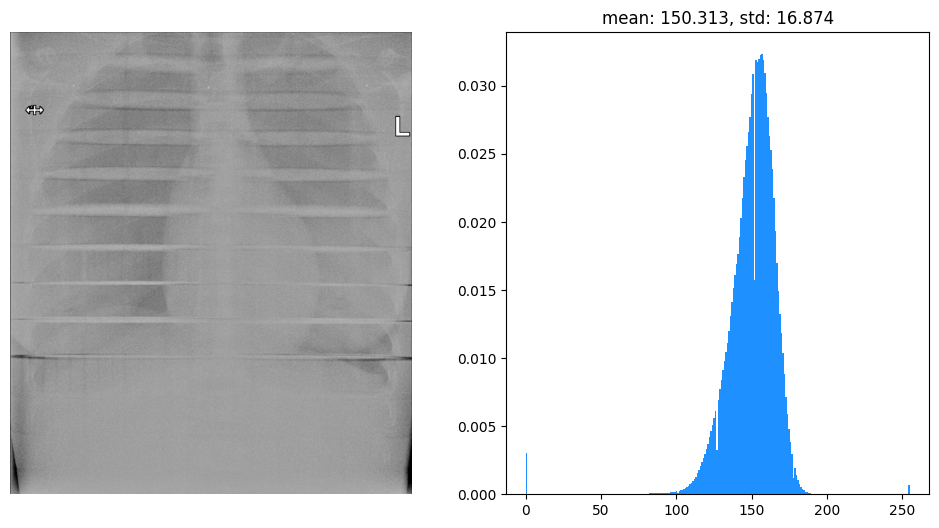

In [36]:
image_1 = get_image(2)
image_2 = get_image(14)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image_1, cmap='gray', vmin = 0, vmax = 255)
axs[0].axis('off')
axs[1].hist(image_1.flatten(), bins = 256, density = True, color = 'dodgerblue')
#axs[1].axis('off')
axs[1].set_title(f'mean: {np.mean(image_1.flatten()):.3f}, std: {np.std(image_1.flatten()):.3f}')
plt.savefig(r'/home/alex/Documents/Images_thesis/phantom_example_with_hist_1.png', bbox_inches="tight")
plt.show()

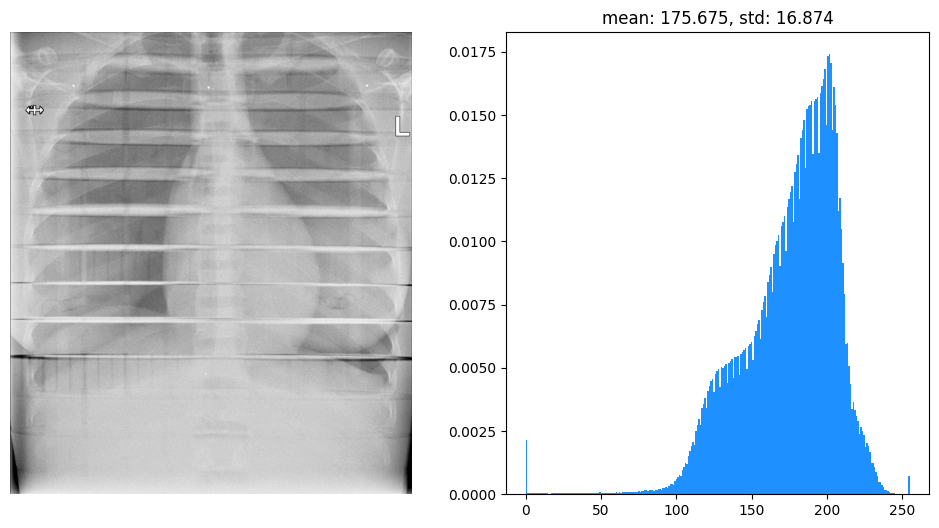

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image_2, cmap='gray', vmin = 0, vmax = 255)
axs[0].axis('off')
axs[1].hist(image_2.flatten(), bins = 256, density = True, color = 'dodgerblue')
#axs[1].axis('off')
axs[1].set_title(f'mean: {np.mean(image_2.flatten()):.3f}, std: {np.std(image_1.flatten()):.3f}')
plt.savefig(r'/home/alex/Documents/Images_thesis/phantom_example_with_hist_2.png', bbox_inches="tight")
plt.show()

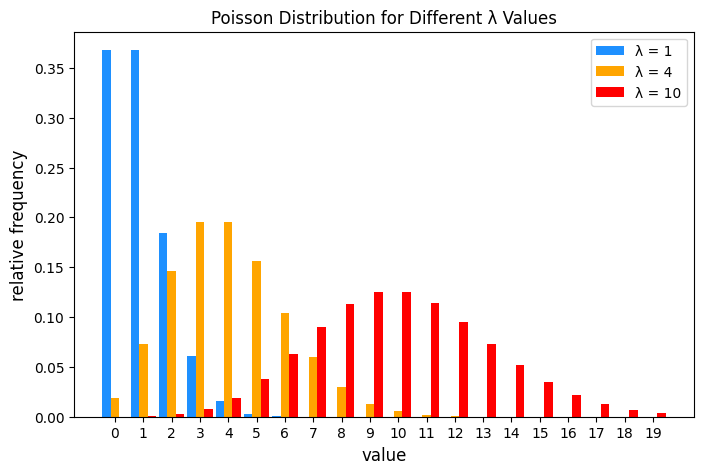

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define lambda values
lambda_values = [1, 4, 10]

# Define the range of x values (k values) for the Poisson distribution
x = np.arange(0, 20)

markers = ['o', 's', '^']  # Circle, square, and triangle markers
colors = ['dodgerblue', 'orange', 'red']

# Create the plot
plt.figure(figsize=(8, 5))

# Plot the Poisson distribution for each lambda with different markers
for lam, marker, col, w in zip(lambda_values, markers, colors, [-0.3, 0, 0.3]):
    pmf = poisson.pmf(x, lam)  # Poisson probability mass function
    plt.bar(x+w, pmf, width=0.3, color=col, align='center', label=f'λ = {lam}')
    #plt.bar(x, pmf)#(x, pmf, marker=marker, label=f'λ = {lam}', linestyle='-', markersize=6, color = col)


# Add titles and labels
plt.title('Poisson Distribution for Different λ Values')
plt.xlabel('value', size = 12)
plt.ylabel('relative frequency', size = 12)
plt.legend()
plt.xticks(np.arange(min(x), max(x)+1, 1))
# Show the plot
#plt.grid(True)
#plt.savefig(r'/home/alex/Documents/Images_thesis/poission_dist_example.png', bbox_inches="tight")
plt.show()


In [15]:
means, stds, noise_std = [], [], []
for i in range(18):
    image = get_image(i)
    image_crop = image[2000:, 200:1900]
    means.append(image.mean())
    stds.append(image.std())
    noise_std.append(image_crop.std())

x_values = list(map(str, image_information['muAs'].to_list())) 

In [16]:
x_values

['650',
 '710',
 '760',
 '840',
 '950',
 '1050',
 '1150',
 '1250',
 '1390',
 '1550',
 '1760',
 '1940',
 '2120',
 '2630',
 '2920',
 '3330',
 '3710',
 '4120']

In [19]:
x_values_labels = ['650','','','','','1050','','','','','1760','','','','2920','','','4120']
#['650','','760','','','1050','','','','1550','','','','2630','','','','4120']

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

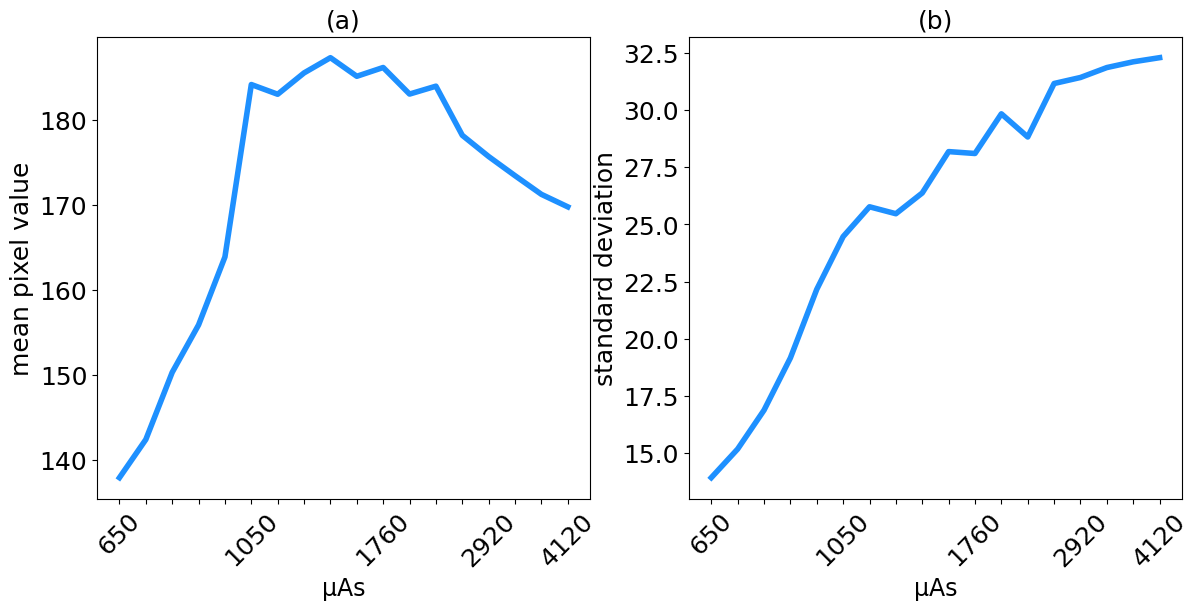

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(x_values, means, color = 'dodgerblue',linewidth=4)
axs[0].set_title('(a)',size = 18)
#axs[0].tick_params(axis='x', labelrotation=45,size = 15)
axs[0].tick_params(axis='y', labelsize=18)
axs[0].set_xticks(x_values, x_values_labels)
axs[0].tick_params(axis='x', labelsize=18, rotation=45)
axs[0].set_xlabel('\u03bcAs', size = 17)
axs[0].set_ylabel('mean pixel value', size = 18)


axs[1].plot(x_values, stds, color = 'dodgerblue',linewidth=4)
axs[1].set_title('(b)',size = 18)   
#axs[1].tick_params(axis='x', labelrotation=45,size = 14)
axs[1].tick_params(axis='y', labelsize=18)
axs[1].set_xticks(x_values, x_values_labels)
axs[1].tick_params(axis='x', labelsize=18, rotation=45)
axs[1].set_xlabel('\u03bcAs', size = 17)
axs[1].set_ylabel('standard deviation', size = 18)

#plt.savefig(r'/home/alex/Documents/Images_thesis/phantom_mean_std_plots.png', bbox_inches="tight")
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


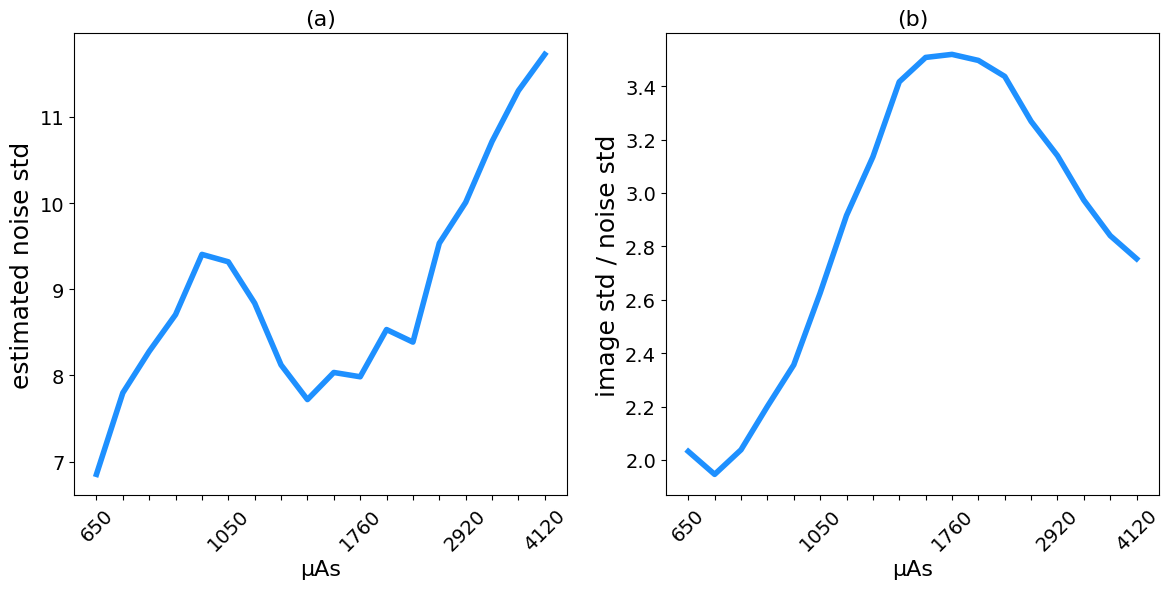

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(x_values, noise_std, color = 'dodgerblue',linewidth=4)
axs[0].set_title('(a)',size = 16)
#axs[0].set_xticklabels(x_values, rotation=45, fontsize=12) #.tick_params(axis='x', labelrotation=45,size = 14)
axs[0].set_xlabel('\u03bcAs',size = 16)
axs[0].tick_params(axis='y', labelsize=14)
axs[0].set_xticks(x_values, x_values_labels)
axs[0].tick_params(axis='x', labelsize=14, rotation=45)
axs[0].set_ylabel('estimated noise std',size = 18)

ratio = [x / y for x, y in zip(stds, noise_std)]
axs[1].plot(x_values, ratio, color = 'dodgerblue',linewidth=4)
axs[1].set_title('(b)',size = 16)
#axs[1].set_xticklabels(x_values, rotation=45, fontsize=12) #.tick_params(axis='x', labelrotation=45 ,size = 20)
axs[1].tick_params(axis='y', labelsize=14)
axs[1].set_xticks(x_values, x_values_labels)
axs[1].tick_params(axis='x', labelsize=14, rotation=45)
axs[1].set_xlabel('\u03bcAs',size = 16)
axs[1].set_ylabel('image std / noise std',size = 18)

plt.savefig(r'/home/alex/Documents/Images_thesis/phantom_noise_std_ratio.png', bbox_inches="tight")
plt.show()